/home/vacat/x.olive/students/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


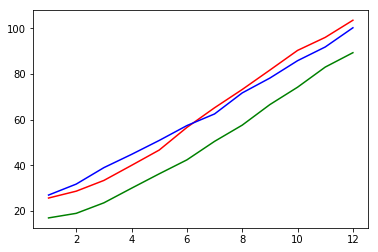

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Likelihood:         -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
groups RE    40.394    2.149                            



In [1]:
#Exercice inspire de http://www.statsmodels.org/stable/mixed_linear.html

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


data = sm.datasets.get_rdataset("dietox", "geepack").data

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#QUESTION 1 : En s'inspirant de ce qui s'est fait dans l'exercice 
#precedent, représenter les courbes d'evolution du poids dans le temps 
#pour les cochons 8439, 4756, 4643.
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.plot(data['Time'][data.Pig == 8442],data['Weight'][data.Pig == 8442],'r')
plt.plot(data['Time'][data.Pig == 4756],data['Weight'][data.Pig == 4756],'g')
plt.plot(data['Time'][data.Pig == 4643],data['Weight'][data.Pig == 4643],'b')
plt.show()


md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit()
print(mdf.summary())



In [5]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#QUESTION 2 : Taper 'mdf?' ou mdf.[TAB] pour comprendre ce que contient 
#             mdf
#
#QUESTIONS 3 : Quel est le poids moyen a l'orignie et la croissance 
#              moyenne (au sens des moindres carres) ?
#              Quels sont les cochons les plus lourds et les plus leger ?
#
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
"""
-> mdf.fe_params.Intercept
-> mdf.fe_params.Time
-> mdf.random_effects -> effets aléatoires (ecart a la moyenne)
"""
highest=-1.
lowest=100.
for key in mdf.random_effects.keys():
  if (highest<mdf.random_effects[key].Group):
    highest=mdf.random_effects[key].Group
    highest_Key=key
  if (lowest>mdf.random_effects[key].Group):
    lowest=mdf.random_effects[key].Group
    lowest_Key=key

plt.plot(data['Time'][data.Pig == highest_Key],data['Weight'][data.Pig == highest_Key],'r')
plt.plot(data['Time'][data.Pig == 8442],data['Weight'][data.Pig == 8442],'g')
plt.plot(data['Time'][data.Pig == 4756],data['Weight'][data.Pig == 4756],'g')
plt.plot(data['Time'][data.Pig == 4643],data['Weight'][data.Pig == 4643],'g')
plt.plot(data['Time'][data.Pig == lowest_Key],data['Weight'][data.Pig == lowest_Key],'b')
plt.show()


AttributeError: 'Series' object has no attribute 'Group'

In [3]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#QUESTION 4 : Est-ce que le groupe 'Cu' semble avoir une influence sur 
#             le poids ?
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

md2 = smf.mixedlm("Weight ~ Time", data, groups=data["Cu"])
mdf2 = md2.fit()

mdf.fe_params
mdf2.fe_params

mdf2.random_effects

{1: groups   -0.267825
 dtype: float64, 2: groups   -1.048186
 dtype: float64, 3: groups    1.316011
 dtype: float64}